In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def h_1(x):
    return x*0+1
def h_2(x):
    return x
def h_3(x):
    return x**2

h = [h_1, h_2, h_3]

#def m(x, beta):
#    return sum([b[0] * h[i](x) for i, b in enumerate(beta)])
def m(mu, h_x):
    return (mu * h_x).sum()

#def sigma_2(x, sigma):
#    return sum([(b[1] * h[i](x))**2 for i, b in enumerate(beta)])
def sigma_2(sigma, h_x):
    return (sigma * h_x).pow(2).sum()

def log_normal_pdf(y, mu, sigma):
    return -1/2*(torch.log(2*np.pi*(sigma**2)) + ((y-mu)/sigma)**2)

def log_lik(x, y, beta, h_all):
    return sum([log_normal_pdf(y_i, m(beta[0], h_all[i]), sigma_2(beta[1], h_all[i])) for i, (y_i, x_i) in enumerate(zip(y,x))])


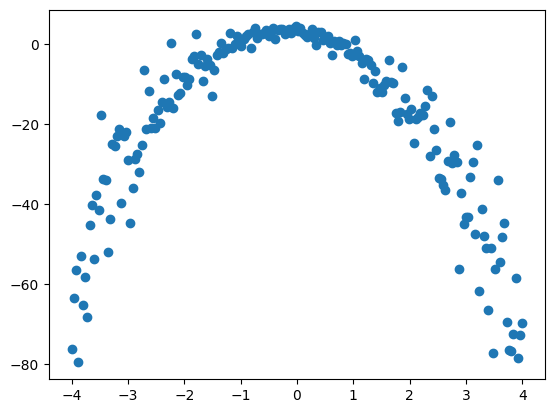

0 tensor([ 0.1000, -0.1000, -0.1000], dtype=torch.float64, requires_grad=True) tensor([1.1000, 0.9000, 0.9000], dtype=torch.float64, requires_grad=True)
10 tensor([ 0.7278, -1.0664, -1.0624], dtype=torch.float64, requires_grad=True) tensor([1.7312, 1.0421, 0.4577], dtype=torch.float64, requires_grad=True)
20 tensor([ 0.8635, -1.7416, -2.0749], dtype=torch.float64, requires_grad=True) tensor([1.6814, 0.8584, 0.3350], dtype=torch.float64, requires_grad=True)
30 tensor([ 0.9927, -1.9944, -3.1347], dtype=torch.float64, requires_grad=True) tensor([1.3813, 0.4381, 0.3175], dtype=torch.float64, requires_grad=True)
40 tensor([ 1.7759, -1.7605, -3.8953], dtype=torch.float64, requires_grad=True) tensor([1.4252, 0.5437, 0.2193], dtype=torch.float64, requires_grad=True)
50 tensor([ 2.7267, -1.7818, -4.0378], dtype=torch.float64, requires_grad=True) tensor([1.2874, 0.8055, 0.1138], dtype=torch.float64, requires_grad=True)
60 tensor([ 3.3136, -1.7962, -4.0929], dtype=torch.float64, requires_grad=Tru

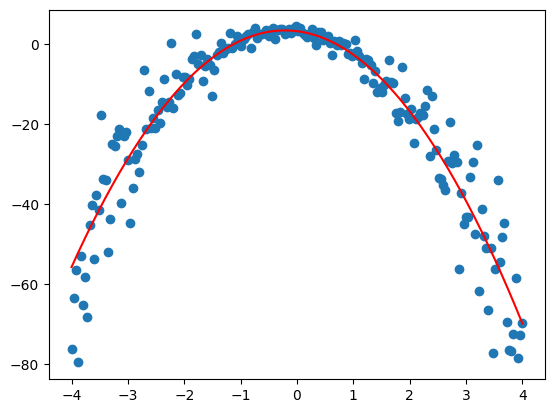

[tensor([ 3.1597, -1.7629, -4.1245], dtype=torch.float64, requires_grad=True), tensor([ 9.0635e-01,  9.5994e-01, -8.0173e-05], dtype=torch.float64,
       requires_grad=True)]


In [4]:

torch.manual_seed(1)
N = 200
x = torch.linspace(-4,4, N)
y = (torch.randn(N)-4) * x**2 + (-2+torch.randn(N)) * x + (3+torch.randn(N))

#Calculate all h(x) in before hand, they are reused each epoch
h_1_data = h_1(x)
h_2_data = h_2(x)
h_3_data = h_3(x)
h_all = torch.transpose(torch.stack([h_1_data, h_2_data, h_3_data], 0), 0, 1)

# Create Mu and Sigma for each 
mu = torch.tensor([0., 0., 0.], dtype=float, requires_grad=True)
sigma = torch.tensor([1., 1., 1.], dtype=float, requires_grad=True)
beta = [mu, sigma]

plt.scatter(x, y)
plt.show()

optimizer = torch.optim.Adam(beta,lr=0.1, maximize=True)
for epoch in range(200):
    optimizer.zero_grad()
    loss = log_lik(x, y, beta, h_all)
    loss.backward()
    optimizer.step()
    if epoch%10==0:
        print(epoch, mu, sigma)
mu = beta[0].detach().numpy()
sigma = beta[1].detach().numpy()
plt.show()
plt.scatter(x,y)
plt.plot(x, mu[2]*x**2+mu[1]*x+mu[0], 'r-')
plt.plot(x, mu[2]*x**2+mu[1]*x+mu[0]-2*sigma[0], 'r--')
plt.plot(x, mu[2]*x**2+mu[1]*x+mu[0]+2*sigma[0], 'r--')
#plt.plot(x, (aMax-aVar**0.5)*x**2+bMax*x+cMax, 'r--')
#plt.plot(x, (aMax+aVar**0.5)*x**2+bMax*x+cMax, 'r--')
plt.show()
print(beta)

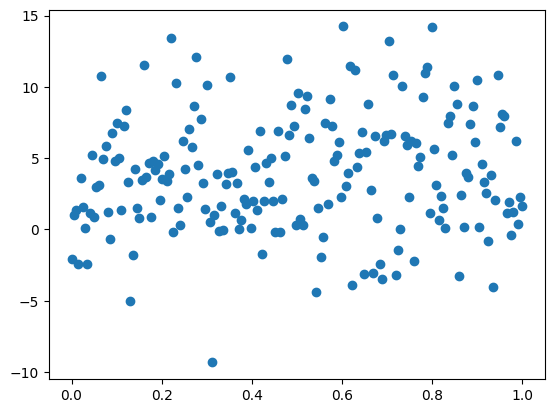

0 tensor([0.1000], dtype=torch.float64, requires_grad=True) tensor([1.1000], dtype=torch.float64, requires_grad=True)
10 tensor([0.8727], dtype=torch.float64, requires_grad=True) tensor([1.8009], dtype=torch.float64, requires_grad=True)
20 tensor([1.3022], dtype=torch.float64, requires_grad=True) tensor([2.1088], dtype=torch.float64, requires_grad=True)
30 tensor([1.5542], dtype=torch.float64, requires_grad=True) tensor([2.2370], dtype=torch.float64, requires_grad=True)
40 tensor([1.7220], dtype=torch.float64, requires_grad=True) tensor([2.2827], dtype=torch.float64, requires_grad=True)
50 tensor([1.8529], dtype=torch.float64, requires_grad=True) tensor([2.2905], dtype=torch.float64, requires_grad=True)
60 tensor([1.9701], dtype=torch.float64, requires_grad=True) tensor([2.2808], dtype=torch.float64, requires_grad=True)
70 tensor([2.0840], dtype=torch.float64, requires_grad=True) tensor([2.2632], dtype=torch.float64, requires_grad=True)
80 tensor([2.1993], dtype=torch.float64, requires

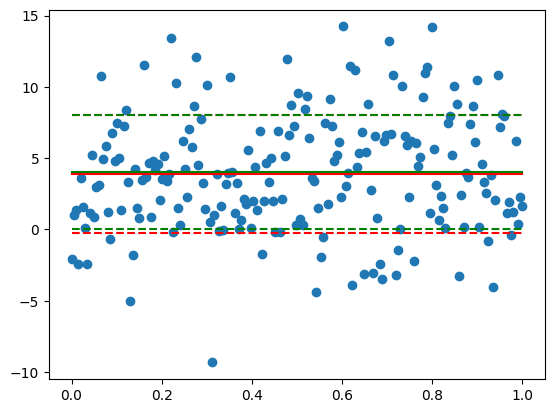

[tensor([3.9013], dtype=torch.float64, requires_grad=True), tensor([2.0289], dtype=torch.float64, requires_grad=True)]


In [19]:


torch.manual_seed(1)
N = 200
real_mu = 4
real_sigma = 2**2
x_plot = torch.linspace(0,1, N)
x = torch.linspace(0,1, N)
y = (torch.randn(N)) *real_sigma + real_mu

#Calculate all h(x) in before hand, they are reused each epoch
def h_1(x):
    return x*0+1
h_1_data = h_1(x)
h_all = torch.transpose(torch.stack([h_1_data], 0), 0, 1)

# Create Mu and Sigma for each 
mu = torch.tensor([0.], dtype=float, requires_grad=True)
sigma = torch.tensor([1.], dtype=float, requires_grad=True)
beta = [mu, sigma]

plt.scatter(x_plot, y)
plt.show()

optimizer = torch.optim.Adam(beta,lr=0.1, maximize=True)
for epoch in range(700):
    optimizer.zero_grad()
    loss = log_lik(x, y, beta, h_all)
    loss.backward()
    optimizer.step()
    if epoch%10==0:
        print(epoch, mu, sigma)
mu = beta[0].detach().numpy()
sigma = beta[1].detach().numpy()
plt.show()
plt.scatter(x,y)
plt.plot(x, x*0+mu[0], 'r-')
plt.plot(x, x*0+mu[0]-sigma[0]**2, 'r--')
plt.plot(x, x*0+mu[0]+sigma[0]**2, 'r--')

plt.plot(x, x*0+real_mu, 'g-')
plt.plot(x, x*0+real_mu-real_sigma, 'g--')
plt.plot(x, x*0+real_mu+real_sigma, 'g--')
#plt.plot(x, (aMax-aVar**0.5)*x**2+bMax*x+cMax, 'r--')
#plt.plot(x, (aMax+aVar**0.5)*x**2+bMax*x+cMax, 'r--')
plt.show()
print(beta)